**TRABAJO PRÁCTICO APRENDIZAJE AUTOMÁTICO I TUIA 2024**

INTEGRANTES:

Herrera Morena (H-1187/8)

Zorzolo Rubio Juana (Z-1217/3)

En este trabajo, se tiene como objetivo predecir los precios de las viviendas en Boston (MEDV) a partir de un conjunto de características socioeconómicas. Empleamos el conjunto de datos house-prices.csv.

Utilizamos técnicas de Regresión Lineal, y exploramos diferentes enfoques de optimización de modelos, como la variación de hiperparámetros y el uso de regularización, con el fin de mejorar los resultados y seleccionar el modelo que mejor se ajuste a los datos.

# Carga de datos

In [63]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, ElasticNetCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [64]:
!gdown "1d--T75QSJ9ybIQYmPzHV725xbHroVUvS" --output "house-prices-tp.csv"

Downloading...
From: https://drive.google.com/uc?id=1d--T75QSJ9ybIQYmPzHV725xbHroVUvS
To: c:\Users\juana\OneDrive\Documentos\TP_AAI\house-prices-tp.csv

  0%|          | 0.00/46.9k [00:00<?, ?B/s]
100%|██████████| 46.9k/46.9k [00:00<00:00, 5.71MB/s]


In [65]:
df_house = pd.read_csv('house-prices-tp.csv')
df_house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.07151,0.0,4.49,0.0,0.449,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44,22.2
1,0.08265,0.0,13.92,0.0,0.437,6.127,18.4,5.5027,4.0,289.0,16.0,396.90,8.58,23.9
2,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79,20.9
3,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7
4,0.11432,0.0,8.56,0.0,0.520,6.781,71.3,2.8561,5.0,384.0,20.9,395.58,7.67,26.5


### Información general

Obtenemos información general del dataset y las variables que lo componen, observando la presencia de valores faltantes/nulos para posteriormente tratarlos de la mejor manera posible.

In [66]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     533 non-null    float64
 1   ZN       534 non-null    float64
 2   INDUS    541 non-null    float64
 3   CHAS     533 non-null    float64
 4   NOX      532 non-null    float64
 5   RM       535 non-null    float64
 6   AGE      532 non-null    float64
 7   DIS      541 non-null    float64
 8   RAD      528 non-null    float64
 9   TAX      538 non-null    float64
 10  PTRATIO  528 non-null    float64
 11  B        534 non-null    float64
 12  LSTAT    534 non-null    float64
 13  MEDV     535 non-null    float64
dtypes: float64(14)
memory usage: 60.9 KB


In [67]:
df_house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,533.000000,534.000000,541.000000,533.000000,532.000000,535.000000,532.000000,541.000000,528.000000,538.000000,528.000000,534.000000,534.000000,535.000000
mean,5.845517,13.197175,11.218725,0.090056,0.560050,6.291839,67.632303,3.944102,9.699379,409.575089,18.429904,347.806040,13.028092,22.746809
std,13.828631,24.902981,6.942021,0.286531,0.119472,0.782403,28.461925,2.255689,8.684495,167.689379,2.194759,99.636208,7.579972,9.491452
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.084470,0.000000,5.130000,0.000000,0.453000,5.875500,42.275000,2.112100,4.000000,279.000000,17.000000,369.530000,7.150000,16.750000
50%,0.315330,0.000000,9.690000,0.000000,0.538000,6.208000,76.500000,3.340107,5.000000,335.000000,19.000000,390.815000,11.465000,21.200000
75%,4.871410,20.000000,18.100000,0.000000,0.643986,6.638500,93.825000,5.400700,23.632660,666.000000,20.200000,395.890000,17.205000,26.300000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Partición de datos

Se decidió realizar la validación cruzada train-test antes de la limpieza y análisis del conjunto de datos ya que así aseguramos que el modelo evalúe de manera justa en datos que nunca ha visto durante el entrenamiento. El objetivo es simular cómo se comportaría el modelo con datos reales, fuera del entorno controlado.

Separamos las variables independientes (X) de la variable dependiente (y), que en nuestro trabajo es la variable MEDV (a quien queremos predecir).

In [68]:
X = df_house.drop("MEDV", axis=1)
y = df_house["MEDV"]

Dividimos también los datos en TRAIN y TEST, fundamental para poder entrenar nuestro modelo y luego testearlo.

Decidimos separar un 80% para entrenamiento, y el 20% restante para prueba.

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((444, 13), (112, 13), (444,), (112,))

In [71]:
# Combinamos los datas de entrenamiento y los de testeo para mayor facilidad al momento de trabajarlos
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

# Análisis Descriptivo

## Visualización de datos

### Matriz de correlación

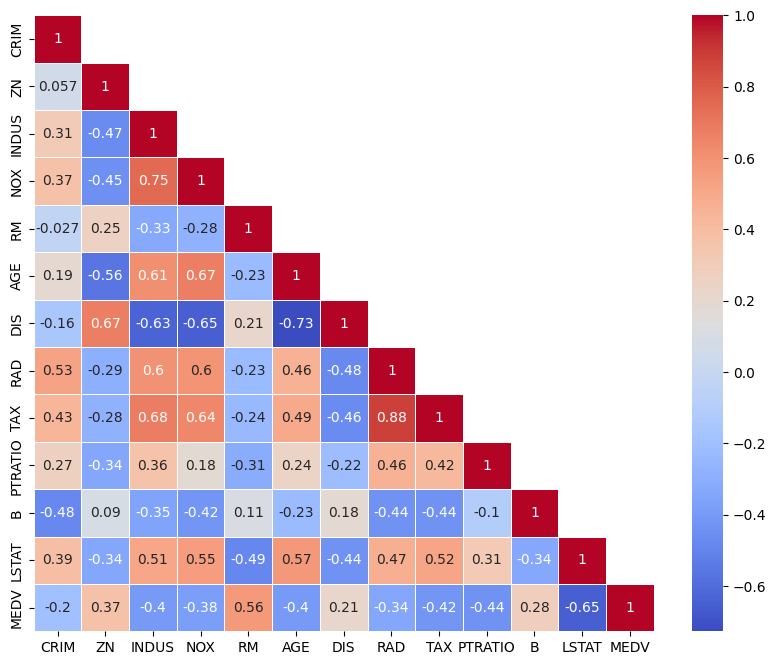

In [72]:
df_train_matriz = df_train.drop(columns=['CHAS'])
corrmat = df_train_matriz.corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool), k=1)
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, mask=mask, vmax=1, annot=True, linewidths=.5, cmap='coolwarm')
plt.show()

Dada la matriz de correlación, decidimos observar en detalle con un scatterplot la relación entre las variables que presentan una correlación lineal inversa o directa más fuerte.

### Relación AGE-DIS

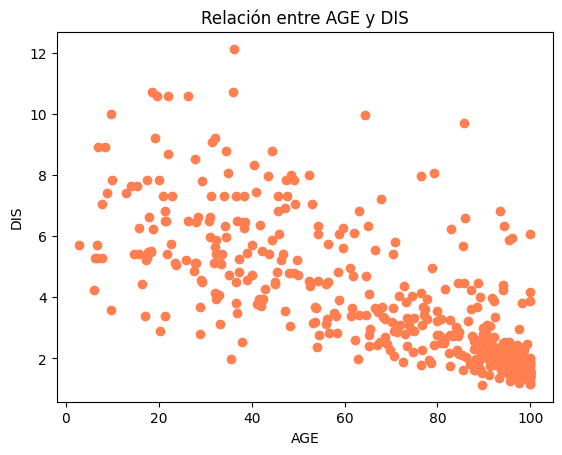

In [73]:
plt.scatter(df_train['AGE'], df_train['DIS'], color = 'coral')
plt.xlabel('AGE')
plt.ylabel('DIS')
plt.title('Relación entre AGE y DIS')
plt.show()

Conclusión: el gráfico realizado nos confirma la correlación lineal inversa.
A mayor proporción de unidades ocupadas por sus propietarios construidas antes de 1940, menor distancias ponderadas a cinco centros de empleo de Boston.

### Relación NOX-INDUS

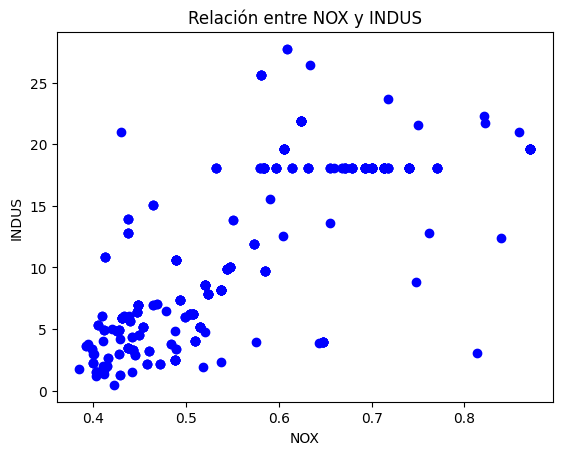

In [74]:
plt.scatter(df_train['NOX'], df_train['INDUS'], color = 'blue')
plt.xlabel('NOX')
plt.ylabel('INDUS')
plt.title('Relación entre NOX y INDUS')
plt.show()

Conclusión: el gráfico realizado confirma la correlación lineal directa.
A mayor concentración de óxidos de nitrógeno (partes por 10 millones) [parts/10M], mayor proporción de acres de negocios no minoristas por ciudad.

### Relación MEDV-RM

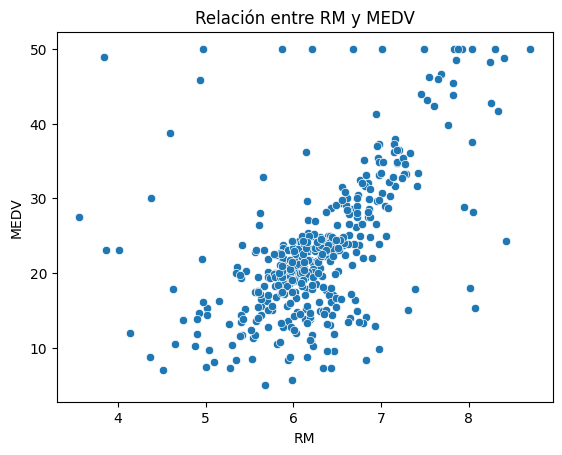

In [75]:
sns.scatterplot(x='RM', y='MEDV', data=df_train)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Relación entre RM y MEDV')
plt.show()

Conclusión: Vemos que a mayor número de habitaciones por vivienda, mayor es el valor mediano de las viviendas en miles de dólares. Esto indica una correlación lineal directa.

### Relación MEDV-LSTAT

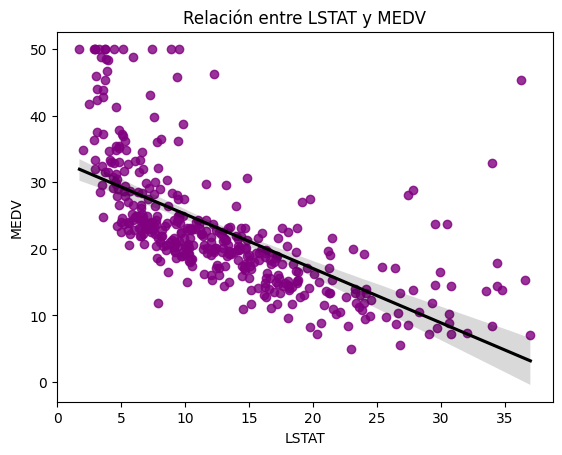

In [76]:
sns.regplot(x='LSTAT', y='MEDV', data=df_train, scatter_kws={'color':'purple'}, line_kws={'color':'black'})
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Relación entre LSTAT y MEDV')
plt.show()

Conclusión: Contemplamos la correlación lineal inversa. A mayor porcentaje de población de menor estatus socioeconómico, menor valor mediano de las viviendas en miles de dólares.

### Distribución de MEDV

Consideramos necesario realizar un gráfico de distribución de la variable targer 'MEDV', para entender su comportamiento, ver si la variable es simétrica o si presenta algún sesgo.

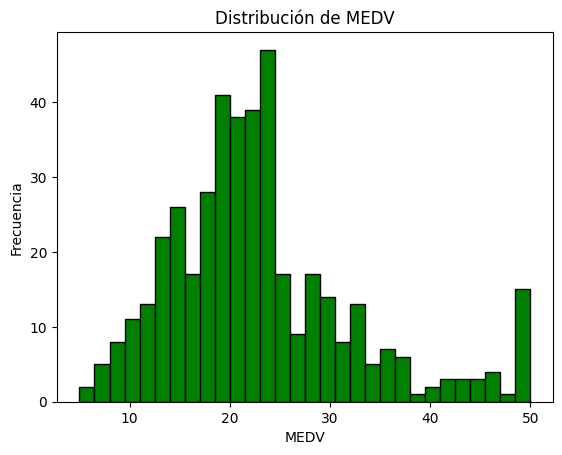

In [77]:
plt.hist(df_train['MEDV'], bins=30, color='green', edgecolor='black')
plt.xlabel('MEDV')
plt.ylabel('Frecuencia')
plt.title('Distribución de MEDV')
plt.show()

Conclusión: El gráfico nos muestra que, luego de aplicar el escalado robusto, los valores de la variable MEDV están centrados en torno a 0 (por esto mismo es que hay valores negativos). También observamos que la distribución es asimétrica hacia la derecha, con una mayor cantidad de valores a la izquierda de la mediana y una cola larga hacia la derecha.

### Distribución de MEDV según el límite con el río Charles

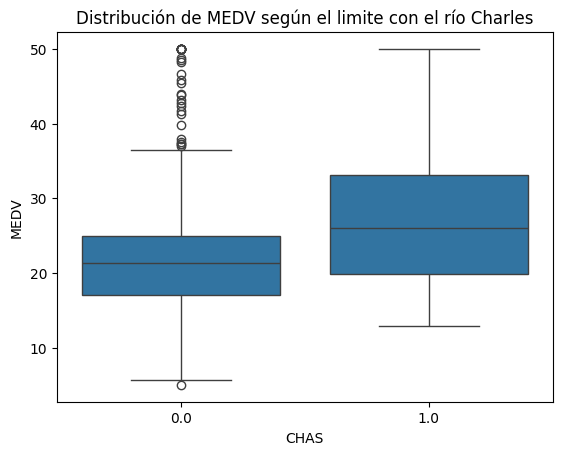

In [78]:
sns.boxplot(x='CHAS', y='MEDV', data=df_train)
plt.xlabel('CHAS')
plt.ylabel('MEDV')
plt.title('Distribución de MEDV según el limite con el río Charles')
plt.show()

Conclusión: Podemos observar que las viviendas que no limitan con el río Charles, tienden a tener un valor menor en comparación con las que si limitan con el río.

# Limpieza de datos

## Valores nulos

### Para df_train

Respecto a los valores nulos, la primer decisión que tomamos fue eliminar las filas que contengan más del 70% de variables con valores nulos, ya que consideramos que es muy probable que la información que contienen sea insuficiente o poco representativa para realizar un análisis adecuado. Mantener estas filas podría generar ruido en el modelo, afectando negativamente la calidad de las predicciones.

In [79]:
filas_nan = df_train[df_train.isna().sum(axis=1) > 9]
q_filas_nan = len(filas_nan)
df_train = df_train.dropna(thresh=df_train.shape[1] - 9)

Luego, tomamos la decisión de imputar los valores faltantes:

- A la variable categórica CHAS con la moda
- Al resto de las variables con el promedio

No utilizamos KNN para la imputación de datos faltantes ya que no tenemos certeza de que las observaciones sigan un criterio de organización claro, como por ejemplo, la recolección por zona. En tal caso, si podriamos confiar en los resultados de KNN.

In [80]:
df_train['CHAS'].fillna(df_train['CHAS'].mode().iloc[0], inplace=True)

C:\Users\juana\AppData\Local\Temp\ipykernel_21688\3227214440.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['CHAS'].fillna(df_train['CHAS'].mode().iloc[0], inplace=True)


In [81]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(df_train)
df_train_imputed = pd.DataFrame(imputer.transform(df_train), columns = df_train.columns)

Confirmamos los cambios realizados:

In [82]:
df_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     434 non-null    float64
 1   ZN       434 non-null    float64
 2   INDUS    434 non-null    float64
 3   CHAS     434 non-null    float64
 4   NOX      434 non-null    float64
 5   RM       434 non-null    float64
 6   AGE      434 non-null    float64
 7   DIS      434 non-null    float64
 8   RAD      434 non-null    float64
 9   TAX      434 non-null    float64
 10  PTRATIO  434 non-null    float64
 11  B        434 non-null    float64
 12  LSTAT    434 non-null    float64
 13  MEDV     434 non-null    float64
dtypes: float64(14)
memory usage: 47.6 KB


### Para df_test

Tanto para los datos de entrenamiento, como para los de testeo, se tomaron las mismas decisiones.

In [83]:
filas_nan = df_test[df_test.isna().sum(axis=1) > 9]
q_filas_nan = len(filas_nan)
df_test = df_test.dropna(thresh=df_test.shape[1] - 9)

In [84]:
df_test['CHAS'].fillna(df_test['CHAS'].mode().iloc[0], inplace=True)

C:\Users\juana\AppData\Local\Temp\ipykernel_21688\2223118995.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['CHAS'].fillna(df_test['CHAS'].mode().iloc[0], inplace=True)


In [85]:
df_test_imputed = pd.DataFrame(imputer.transform(df_test), columns = df_test.columns)

Confirmamos los cambios realizados:

In [86]:
df_test_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     112 non-null    float64
 1   ZN       112 non-null    float64
 2   INDUS    112 non-null    float64
 3   CHAS     112 non-null    float64
 4   NOX      112 non-null    float64
 5   RM       112 non-null    float64
 6   AGE      112 non-null    float64
 7   DIS      112 non-null    float64
 8   RAD      112 non-null    float64
 9   TAX      112 non-null    float64
 10  PTRATIO  112 non-null    float64
 11  B        112 non-null    float64
 12  LSTAT    112 non-null    float64
 13  MEDV     112 non-null    float64
dtypes: float64(14)
memory usage: 12.4 KB


## Valores atípicos

Decidimos realizar un Boxplot para poder observar e identificar los valores atípicos.

In [87]:
# Función para contar outliers
def contar_outliers(df):
    outliers = {}

    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        inferior = Q1 - 1.5 * IQR
        superior = Q3 + 1.5 * IQR

        outliers[col] = ((df[col] < inferior) | (df[col] > superior)).sum()

    return outliers

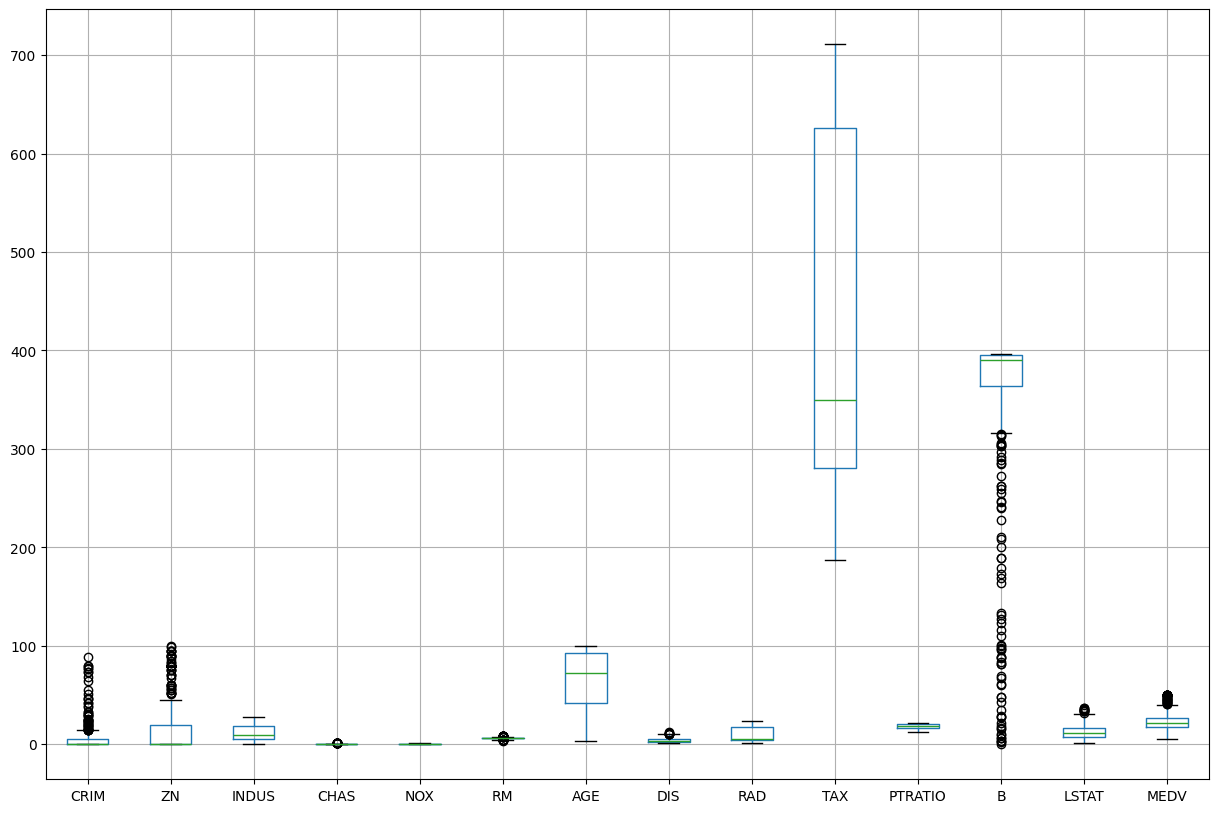

{'CRIM': np.int64(48), 'ZN': np.int64(51), 'INDUS': np.int64(0), 'CHAS': np.int64(34), 'NOX': np.int64(0), 'RM': np.int64(35), 'AGE': np.int64(0), 'DIS': np.int64(8), 'RAD': np.int64(0), 'TAX': np.int64(0), 'PTRATIO': np.int64(0), 'B': np.int64(72), 'LSTAT': np.int64(10), 'MEDV': np.int64(30)}


In [88]:
df_train_imputed.boxplot(figsize=(15, 10))
plt.show()

outliers_por_columna = contar_outliers(df_train_imputed)
print(outliers_por_columna)

Teniendo en cuenta el boxplot, decidimos graficar las variables con mayor cantidad de valores atípicos.

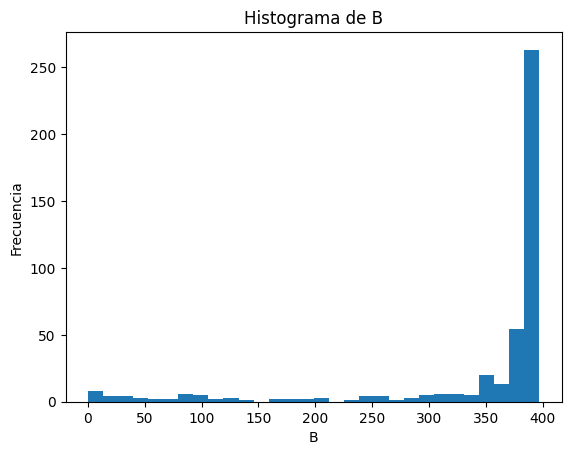

In [89]:
plt.hist(df_train_imputed['B'], bins=30)
plt.xlabel('B')
plt.ylabel('Frecuencia')
plt.title('Histograma de B')
plt.show()

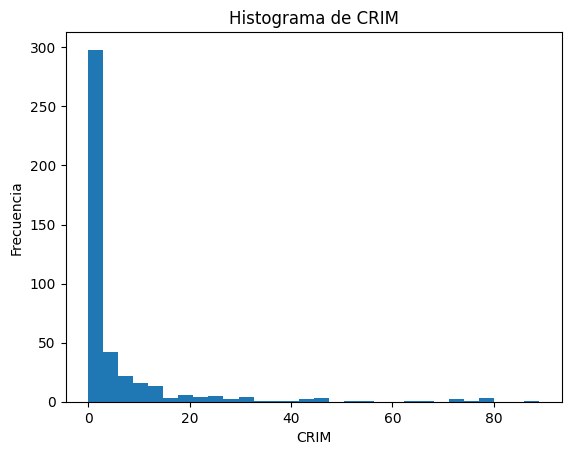

In [90]:
plt.hist(df_train_imputed['CRIM'], bins=30)
plt.xlabel('CRIM')
plt.ylabel('Frecuencia')
plt.title('Histograma de CRIM')
plt.show()

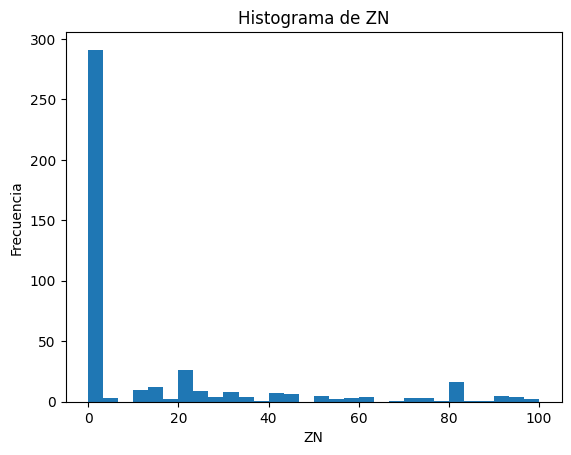

In [91]:
plt.hist(df_train_imputed['ZN'], bins=30)
plt.xlabel('ZN')
plt.ylabel('Frecuencia')
plt.title('Histograma de ZN')
plt.show()

Conclusión: Pudimos observar que estos outliers se deben a una gran asimetría en la distribución de las variables.
De esta manera, decidimos no realizar ningún tratamiento de outliers ya que no lo consideramos necesario. Además, eliminarlos o ajustarlos podría distorsionar la interpretación real de los datos.

## Escalado de datos

Escalamos los datos con el escalado robusto teniendo en cuenta solo las variables cuantitativas continuas.

La variable MEDV no la escalamos debido a que es la target (variable a predecir) y requerimos que los resultados de las métricas (rmse, mae) se interpreten en la misma unidad que la variable original.

### Para df_train

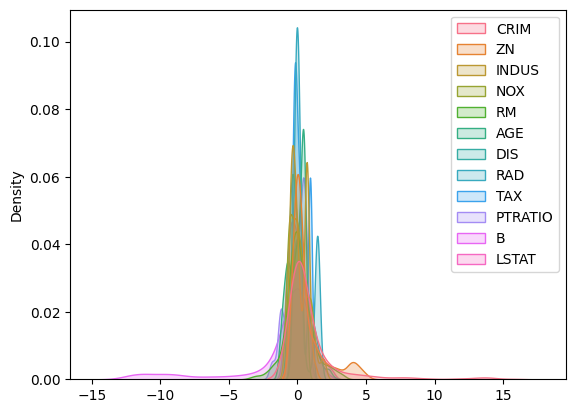

In [92]:
df_train_escalado = df_train_imputed.drop(columns=['CHAS', 'MEDV'])
scaler = RobustScaler()
df_train_escalado = pd.DataFrame(scaler.fit_transform(df_train_escalado), columns=df_train_escalado.columns)

sns.kdeplot(data=df_train_escalado, fill=True)
plt.show()

In [93]:
df_train_escalado['CHAS'] = df_train_imputed['CHAS']
df_train_escalado['MEDV'] = df_train_imputed['MEDV']
df_train_escalado.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS,MEDV
0,-0.047447,2.625,-0.336931,-0.754610,0.122436,-0.530084,1.219285,0.07604,-0.163762,-0.68750,0.206075,-0.398346,0.0,22.3
1,-0.008943,0.000,0.016191,0.034043,-0.257896,0.349663,-0.167361,-0.07604,-0.131879,-0.12500,0.187383,0.030162,0.0,19.4
2,0.940199,0.000,0.648419,0.992908,0.280039,0.300570,-0.327640,1.44476,0.917356,0.43750,-9.037227,0.498192,0.0,14.3
3,-0.045714,3.500,-0.574402,-0.782979,1.068056,-1.229169,1.377212,0.00000,0.024637,-1.25000,-0.582710,-0.695805,0.0,29.0
4,0.328891,0.000,0.762529,1.889362,-0.772387,0.538180,-0.574831,0.00000,0.155067,-1.28125,-6.885202,0.542915,0.0,15.6


### Para df_test

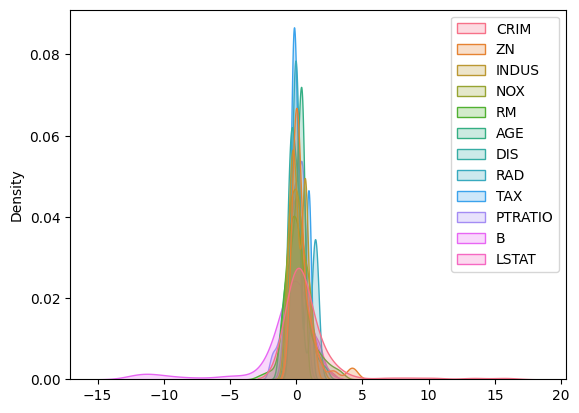

In [94]:
df_test_escalado = df_test_imputed.drop(columns=['CHAS', 'MEDV'])
df_test_escalado = pd.DataFrame(scaler.transform(df_test_escalado), columns=df_test_escalado.columns)
df_test_escalado.head()

sns.kdeplot(data=df_test_escalado, fill=True)
plt.show()

In [95]:
df_test_escalado['CHAS'] = df_test_imputed['CHAS']
df_test_escalado['MEDV'] = df_test_imputed['MEDV']
df_test_escalado.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS,MEDV
0,-0.036769,0.0,1.391673,0.402837,-0.309997,0.514616,-0.466113,-0.07604,1.047786,0.40625,-0.005452,0.690604,0.0,13.6
1,1.656536,0.0,0.648419,0.879433,0.238359,0.538180,-0.536973,1.44476,0.917356,0.43750,-0.441589,0.923579,0.0,12.1
2,0.447250,0.0,0.648419,-0.034043,-0.597851,-0.634161,0.223685,1.44476,0.917356,0.43750,0.082087,-0.105047,0.0,21.8
3,-0.038063,0.0,1.230532,0.243972,-0.445458,0.455704,-0.423367,-0.22812,-0.468098,0.09375,-0.339720,0.639641,0.0,18.8
4,-0.051734,3.0,-0.521203,-0.777305,0.754152,-1.231132,0.879799,-0.30416,-0.244918,-1.00000,0.096106,-0.665643,0.0,31.1


# Regresión lineal

Elegimos evaluar los diferentes modelos con las siguientes 3 métricas:

- R2: Mide la variabilidad de los datos que explica el modelo. De esta manera, indica que tan bien el modelo ajusta los datos, permitiendo tener una visión global de su capacidad predictiva. Además, es sencilla de interpretar.

- RMSE: Calcula, en promedio, cúanto se alejan las predicciones del modelo respecto a los valores reales, manteniendo las mismas unidades que la variable targuet. Refleja la magnitud del error. En este contexto, calcula cuántos miles de dólares en promedio se equivocan las prediciones.

- MAE: Calcula el promedio de los errores absolutos entre las predicciones y los valores reales.Es útil porque es más robusta ante la presencia de outliers, proporcionando una visión más estable del rendimiento del modelo.

Las métricas se evalúan para ambos conjuntos, tanto de entrenamiento como de testeo, ya que la relación entre estos resultados define el fitting del modelo. Sobre el conjunto de entrenamiento, las métricas muestran qué tan bien el modelo se ajusta a los datos que ha visto. En el conjunto de testeo, las métricas evalúan la capacidad de generalización del modelo, es decir, cómo de bien puede predecir sobre datos no vistos.

Volvemos a separar los datos de entrenamiento y testeo, por un lado las variables predictoras (independientes) y por otro la variable a predecir (dependiente).

In [96]:
df_y_train = df_train_escalado['MEDV']
df_y_test = df_test_escalado['MEDV']

df_x_train = df_train_escalado.drop(columns=['MEDV'])
df_x_test = df_test_escalado.drop(columns=['MEDV'])

In [97]:
def evaluate_linear_regression(df_x_train, df_y_train, df_x_test, df_y_test):
    model = LinearRegression()
    model.fit(df_x_train, df_y_train)

    pendiente = model.coef_[0]
    print(f"Pendiente: {pendiente}")

    # Calcular R²
    train_score_lr = model.score(df_x_train, df_y_train)
    test_score_lr = model.score(df_x_test, df_y_test)
    print("R² de entrenamiento para el modelo de regresión lineal: {}".format(train_score_lr))
    print("R² de testeo para el modelo de regresión lineal: {}".format(test_score_lr))

    # Predecir en el conjunto de entrenamiento y prueba
    train_pred_lr = model.predict(df_x_train)
    test_pred_lr = model.predict(df_x_test)

    # Calcular RMSE
    train_rmse_lr = np.sqrt(mean_squared_error(df_y_train, train_pred_lr))
    test_rmse_lr = np.sqrt(mean_squared_error(df_y_test, test_pred_lr))
    print("RMSE de entrenamiento para el modelo de regresión lineal: {}".format(train_rmse_lr))
    print("RMSE de testeo para el modelo de regresión lineal: {}".format(test_rmse_lr))

    # Calcular MAE
    train_mae_lr = mean_absolute_error(df_y_train, train_pred_lr)
    test_mae_lr = mean_absolute_error(df_y_test, test_pred_lr)
    print("MAE de entrenamiento para el modelo de regresión lineal: {}".format(train_mae_lr))
    print("MAE de testeo para el modelo de regresión lineal: {}".format(test_mae_lr))

    return {
        'pendiente': pendiente,
        'train_r2': train_score_lr,
        'test_r2': test_score_lr,
        'train_rmse': train_rmse_lr,
        'test_rmse': test_rmse_lr,
        'train_mae': train_mae_lr,
        'test_mae': test_mae_lr,
        'model': model  # Devolver el modelo para el gráfico de residuos
    }

In [98]:
resultados_lr = evaluate_linear_regression(df_x_train, df_y_train, df_x_test, df_y_test)

Pendiente: 0.06813103519179134
R² de entrenamiento para el modelo de regresión lineal: 0.6127357053269264
R² de testeo para el modelo de regresión lineal: 0.5924127323494508
RMSE de entrenamiento para el modelo de regresión lineal: 5.7856194048686955
RMSE de testeo para el modelo de regresión lineal: 6.189374816073199
MAE de entrenamiento para el modelo de regresión lineal: 3.900720419797014
MAE de testeo para el modelo de regresión lineal: 4.2160875626194185


Conclusión:

- Pendiente (coeficiente): La pendiente obtenida de 0.068, nos indica que por cada unidad que aumente las variables independientes X, la variable dependiente y se incrementará en aproximadamente 0.068 unidades.
Observamos que el coeficiente es muy pequeño, por lo tanto el impacto de X en y es leve.

- R²

-- (Entrenamiento 0.6127): El modelo explica el 61.27% de la variabilidad en los datos de entrenamiento, lo que indica un ajuste aceptable.


-- (Testeo 0.5924): En el conjunto de testeo, el modelo explica el 59.24% de la variabilidad, indicando que tiene un rendimiento similar al de entrenamiento sin mostrar sobreajuste.


- RMSE

-- (Entrenamiento 5.7856): En promedio, el modelo se desvía 5.7856 unidades de los valores reales en los datos de entrenamiento.

-- (Testeo 6.1893): Indica que el modelo generaliza razonablemente bien.


- MAE

-- (Entrenamiento 3.9007): El modelo, en promedio, se desvía 3.9007 unidades en los datos de entrenamiento.

-- (Testeo 4.2161): En testeo, el desvío promedio es ligeramente mayor, pero aún dentro de un rango aceptable.


## Métodos de Regularización

Para la selección de hiperparámetros, comenzamos con valores iniciales arbitrarios y luego los ajustamos durante la variación de los mismos, buscando los que nos resultaran óptimos para mejorar el rendimiento del modelo.

### Ridge

In [99]:
def ridge_regression_model(alpha, df_x_train, df_y_train, df_x_test, df_y_test):
    ridgeReg = Ridge(alpha=alpha)
    ridgeReg.fit(df_x_train, df_y_train)

    # Calcular R²
    train_score_ridge = ridgeReg.score(df_x_train, df_y_train)
    test_score_ridge = ridgeReg.score(df_x_test, df_y_test)
    print("R2 de entrenamiento para el modelo de regresión lineal con ridge: {}".format(train_score_ridge))
    print("R2 de testeo para el modelo de regresión lineal con ridge: {}".format(test_score_ridge))

    # Predecir en el conjunto de entrenamiento y prueba
    train_pred_ridge = ridgeReg.predict(df_x_train)
    test_pred_ridge = ridgeReg.predict(df_x_test)

    # Calcular RMSE
    train_rmse_ridge = np.sqrt(mean_squared_error(df_y_train, train_pred_ridge))
    test_rmse_ridge = np.sqrt(mean_squared_error(df_y_test, test_pred_ridge))
    print("RMSE de entrenamiento para el modelo de regresión lineal con ridge: {}".format(train_rmse_ridge))
    print("RMSE de testeo para el modelo de regresión lineal con ridge: {}".format(test_rmse_ridge))

    # Calcular MAE
    train_mae_ridge = mean_absolute_error(df_y_train, train_pred_ridge)
    test_mae_ridge = mean_absolute_error(df_y_test, test_pred_ridge)
    print("MAE de entrenamiento para el modelo de regresión lineal con ridge: {}".format(train_mae_ridge))
    print("MAE de testeo para el modelo de regresión lineal con ridge: {}".format(test_mae_ridge))

    return {
        'train_r2': train_score_ridge,
        'test_r2': test_score_ridge,
        'train_rmse': train_rmse_ridge,
        'test_rmse': test_rmse_ridge,
        'train_mae': train_mae_ridge,
        'test_mae': test_mae_ridge
    }

In [100]:
ridge_regression_model(100, df_x_train, df_y_train, df_x_test, df_y_test)

R2 de entrenamiento para el modelo de regresión lineal con ridge: 0.5589348092669364
R2 de testeo para el modelo de regresión lineal con ridge: 0.5810843811638611
RMSE de entrenamiento para el modelo de regresión lineal con ridge: 6.174439285762939
RMSE de testeo para el modelo de regresión lineal con ridge: 6.274798087039837
MAE de entrenamiento para el modelo de regresión lineal con ridge: 4.089045624743688
MAE de testeo para el modelo de regresión lineal con ridge: 4.303853229676941


{'train_r2': 0.5589348092669364,
 'test_r2': 0.5810843811638611,
 'train_rmse': np.float64(6.174439285762939),
 'test_rmse': np.float64(6.274798087039837),
 'train_mae': np.float64(4.089045624743688),
 'test_mae': np.float64(4.303853229676941)}

Conclusión:

- R²

-- (Entrenamiento 0.5589): El modelo captura el 55.89% de la variabilidad en los datos de entrenamiento.


-- (Testeo 0.5811): En testeo, explica el 58.11% de la variabilidad en los datos de prueba.

Aunque ambos valores no son muy altos, son bastante cercanos, por lo cual sabemos que el modelo no está sobreajustado ni subajustado significativamente.

- RMSE

-- (Entrenamiento 6.1744): En promedio, las predicciones del modelo se desvían 6.1744 unidades respecto a los valores reales en el conjunto de entrenamiento.

-- (Testeo 6.2748): El error en testeo es similar al de entrenamiento, lo que sugiere una mejor generalización.

Debido a que ambos valores son bastante cercanos, el modelo no se sobreajustó a los datos de entrenamiento y geenraliza bien en datos nuevos.

- MAE

-- (Entrenamiento 4.0890): En promedio, las predicciones en entrenamiento se desvían 4.0890 unidades de los valores reales.

-- (Testeo 4.3039): Refleja un leve aumento en el error comparado con entrenamiento. Sin embargo, el modelo tiene una precisión razonable y no está sufriendo de sobreajuste.


#### Variación de Hiperparámetros

In [101]:
resultados_ridge = ridge_regression_model(5, df_x_train, df_y_train, df_x_test, df_y_test)

R2 de entrenamiento para el modelo de regresión lineal con ridge: 0.6117634332521324
R2 de testeo para el modelo de regresión lineal con ridge: 0.5935038841393179
RMSE de entrenamiento para el modelo de regresión lineal con ridge: 5.792877587468821
RMSE de testeo para el modelo de regresión lineal con ridge: 6.181084476818828
MAE de entrenamiento para el modelo de regresión lineal con ridge: 3.888942583061437
MAE de testeo para el modelo de regresión lineal con ridge: 4.190859673115651


Conclusión luego del ajuste:

- R² (Entrenamiento): 0.6118 | R² (Testeo): 0.5935

La variación de hiperparámetros mejora la capacidad del modelo para explicar la variabilidad tanto en el conjunto de entrenamiento como de testo, acercándose a la regresión estándar.

- RMSE(Entrenamiento): 5.7929  | RMSE (Testeo): 6.1811

El error disminuye ligeramente en comparación al rmse antes de la variación de hiperparámetros, lo que sugiere un mejor ajuste y generalización.

- MAE (Entrenamiento): 3.8889  | MAE (Testeo): 4.1909

El valor en el conjunto de entrenamiento mejoró, indicando la presencia de mayor precisión en las predicciones del modelo.

El ajuste de hiperparámetros mejoró ligeramente los resultados de las métricas y al modelo.



### Lasso

In [102]:
def lasso_regression_model(alpha, df_x_train, df_y_train, df_x_test, df_y_test):
    lasso = Lasso(alpha=alpha)
    lasso.fit(df_x_train, df_y_train)

    # Calcular R²
    train_score_ls = lasso.score(df_x_train, df_y_train)
    test_score_ls = lasso.score(df_x_test, df_y_test)
    print("R2 de entrenamiento para el modelo de regresión lineal con lasso: {}".format(train_score_ls))
    print("R2 de testeo para el modelo de regresión lineal con lasso: {}".format(test_score_ls))

    # Predecir en el conjunto de entrenamiento y prueba
    train_pred_lasso = lasso.predict(df_x_train)
    test_pred_lasso = lasso.predict(df_x_test)

    # Calcular RMSE
    train_rmse_lasso = np.sqrt(mean_squared_error(df_y_train, train_pred_lasso))
    test_rmse_lasso = np.sqrt(mean_squared_error(df_y_test, test_pred_lasso))
    print("RMSE de entrenamiento para el modelo de regresión lineal con lasso: {}".format(train_rmse_lasso))
    print("RMSE de testeo para el modelo de regresión lineal con lasso: {}".format(test_rmse_lasso))

    # Calcular MAE
    train_mae_lasso = mean_absolute_error(df_y_train, train_pred_lasso)
    test_mae_lasso = mean_absolute_error(df_y_test, test_pred_lasso)
    print("MAE de entrenamiento para el modelo de regresión lineal con lasso: {}".format(train_mae_lasso))
    print("MAE de testeo para el modelo de regresión lineal con lasso: {}".format(test_mae_lasso))

    return {
        'train_r2': train_score_ls,
        'test_r2': test_score_ls,
        'train_rmse': train_rmse_lasso,
        'test_rmse': test_rmse_lasso,
        'train_mae': train_mae_lasso,
        'test_mae': test_mae_lasso
    }

In [103]:
lasso_regression_model(0.01, df_x_train, df_y_train, df_x_test, df_y_test)

R2 de entrenamiento para el modelo de regresión lineal con lasso: 0.6126329751449057
R2 de testeo para el modelo de regresión lineal con lasso: 0.5918203910013673
RMSE de entrenamiento para el modelo de regresión lineal con lasso: 5.786386733965935
RMSE de testeo para el modelo de regresión lineal con lasso: 6.193870652746311
MAE de entrenamiento para el modelo de regresión lineal con lasso: 3.8970178958780672
MAE de testeo para el modelo de regresión lineal con lasso: 4.215825304800974


{'train_r2': 0.6126329751449057,
 'test_r2': 0.5918203910013673,
 'train_rmse': np.float64(5.786386733965935),
 'test_rmse': np.float64(6.193870652746311),
 'train_mae': np.float64(3.8970178958780672),
 'test_mae': np.float64(4.215825304800974)}

Conclusión:

- R²

-- (Entrenamiento 0.6126): El modelo captura el 61.26% de la variabilidad presente en los datos de entrenamiento.

-- (Testeo 0.5918): El modelo explica el 59.18% de la variabilidad de los datos de prueba.

Al ser valores relativamente cercanos, el modelo tiene un ajuste aceptable.

- RMSE

-- (Entrenamiento 5.7864): En promedio, las predicciones del modelo se desvían 5.7864 unidades de los valores reales en el conjunto de entrenamiento.

-- (Testeo 6.1939): La proximidad entre este valor y el error de entrenamiento sugiere que el modelo está generalizando bien y no se sobreajusta a los datos de entrenamiento.

- MAE

-- (Entrenamiento 3.8970): En promedio, el modelo se equivoca por 3.8970 unidades en sus predicciones para los datos de entrenamiento.

-- (Testeo 4.2158): El error promedio absoluto es de 4.2158 unidades. La cercanía con el valor de MAE de entrenamiento indica que el modelo mantiene un rendimiento razonable en datos no vistos.

#### Variación de Hiperparámetros

In [104]:
resultados_lasso = lasso_regression_model(0.000001, df_x_train, df_y_train, df_x_test, df_y_test)

R2 de entrenamiento para el modelo de regresión lineal con lasso: 0.6127357053255269
R2 de testeo para el modelo de regresión lineal con lasso: 0.5924126245788204
RMSE de entrenamiento para el modelo de regresión lineal con lasso: 5.785619404879149
RMSE de testeo para el modelo de regresión lineal con lasso: 6.1893756343430955
MAE de entrenamiento para el modelo de regresión lineal con lasso: 3.9007197676494494
MAE de testeo para el modelo de regresión lineal con lasso: 4.2160880410114965


Conclusión luego del ajuste:

- R² (Entrenamiento): 0.6127 | R² (Testeo): 0.5924

Los resultados mejoran ligeramente, acercándose más al modelo estándar.

- RMSE (Entrenamiento): 5.7856  | RMSE (Testeo): 6.1894

El error es casi idéntico al original, lo que indica que el ajuste es prácticamente igual.

- MAE (Entrenamiento): 3.9007  | MAE (Testeo):  4.2161

La diferencia con los resultados antes de la variación es mínima, lo que confirma que la variación de hiperparámetros no afecta significativamente.

En las 3 métricas, el modelo no se encuentra sobreajustando ni subajustando, consiguiendo un desempeño aceptable.

### Elastic Net

In [105]:
def elastic_net_regression_model(df_x_train, df_y_train, df_x_test, df_y_test):
    elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)
    elastic.fit(df_x_train, df_y_train)

    # Calcular R²
    train_score_en = elastic.score(df_x_train, df_y_train)
    test_score_en = elastic.score(df_x_test, df_y_test)
    print("R2 de entrenamiento para el modelo de regresión lineal con elastic net: {}".format(train_score_en))
    print("R2 de testeo para el modelo de regresión lineal con elastic net: {}".format(test_score_en))

    # Predecir en el conjunto de entrenamiento y prueba
    train_pred_elastic = elastic.predict(df_x_train)
    test_pred_elastic = elastic.predict(df_x_test)

    # Calcular RMSE
    train_rmse_elastic = np.sqrt(mean_squared_error(df_y_train, train_pred_elastic))
    test_rmse_elastic = np.sqrt(mean_squared_error(df_y_test, test_pred_elastic))
    print("RMSE de entrenamiento para el modelo de regresión lineal con elastic net: {}".format(train_rmse_elastic))
    print("RMSE de testeo para el modelo de regresión lineal con elastic net: {}".format(test_rmse_elastic))

    # Calcular MAE
    train_mae_elastic = mean_absolute_error(df_y_train, train_pred_elastic)
    test_mae_elastic = mean_absolute_error(df_y_test, test_pred_elastic)
    print("MAE de entrenamiento para el modelo de regresión lineal con elastic net: {}".format(train_mae_elastic))
    print("MAE de testeo para el modelo de regresión lineal con elastic net: {}".format(test_mae_elastic))

    return {
        'train_r2': train_score_en,
        'test_r2': test_score_en,
        'train_rmse': train_rmse_elastic,
        'test_rmse': test_rmse_elastic,
        'train_mae': train_mae_elastic,
        'test_mae': test_mae_elastic
    }

In [106]:
resultados_elastic = elastic_net_regression_model(df_x_train, df_y_train, df_x_test, df_y_test)

R2 de entrenamiento para el modelo de regresión lineal con elastic net: 0.6123814333526244


R2 de testeo para el modelo de regresión lineal con elastic net: 0.592651560214732
RMSE de entrenamiento para el modelo de regresión lineal con elastic net: 5.788265161637016
RMSE de testeo para el modelo de regresión lineal con elastic net: 6.187561202284723
MAE de entrenamiento para el modelo de regresión lineal con elastic net: 3.892693732113641
MAE de testeo para el modelo de regresión lineal con elastic net: 4.204869436491902


Conclusión:

- R²

-- (Entrenamiento 0.6124): El modelo explica el 61.24% de la variabilidad en los datos de entrenamiento.

-- (Testeo 0.5927): En testeo, captura el 59.27% de la variabilidad, lo que muestra un rendimiento aceptable.

Observando la similitud entre ambos valores, el modelo tiene un ajuste aceptable

- RMSE

-- (Entrenamiento 5.7883): En promedio, las predicciones del modelo se desvían 5.7883 unidades respecto a los valores reales en el conjunto de entrenamiento.

-- (Testeo 6.1876): El error promedio en el conjunto de testeo es 6.1876 unidades, muy cercano al valor de entrenamiento pero mayor. Esto indica que el error aumenta ligeramente cuando se evalúa en datos no vistos.

- MAE

--  (Entrenamiento 3.8927): En promedio, el modelo se desvía por 3.8927 unidades en los datos de entrenamiento.

-- (Testeo 4.2049): El error aumenta ligeramente en los datos de prueba. Sin embargo, la diferencia es pequeña, lo que indica que el modelo generaliza bien.

### Gráfico de residuos

El gráfico de residuos ayuda a verificar si el modelo cumple con los supuestos de regresión lineal:

- No hay patrones evidentes: Si los residuos están distribuidos aleatoriamente, sin patrones evidentes, significa que el modelo está ajustando bien los datos.
- Residuos alrededor de 0: Si los residuos están distribuidos alrededor de 0, esto es un buen indicio de que el modelo está haciendo buenas predicciones.

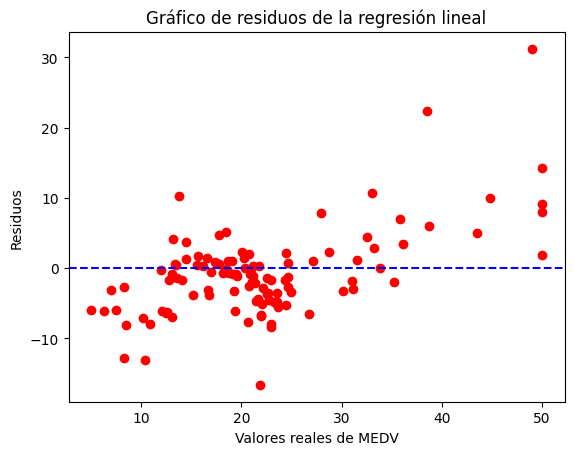

In [107]:
model = resultados_lr['model']
y_pred = model.predict(df_x_test)

residuos = df_y_test - y_pred

plt.scatter(df_y_test, residuos, color='red')
plt.axhline(y=0, color='blue', linestyle='--')
plt.xlabel('Valores reales de MEDV')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos de la regresión lineal')
plt.show()

Conclusión: No observamos patrones evidentes y notamos que los residuos están distribuidos aleatoriamente alrededor del cero.

## Gradiente Descendiente

Tanto para GRADIENTE DESCENDIENTE, ESTOCÁSTICO COMO MINIBATCH:

Para la selección de hiperparámetros, comenzamos con valores iniciales arbitrarios y luego los ajustamos durante la variación de los mismos, buscando los que nos resultaran óptimos para mejorar el rendimiento del modelo.

Las conclusiones se basan en los valores aproximados obtenidos en una ejecución. Sin embargo, los resultados pueden variar entre ejecuciones, ya que los pesos iniciales
de W se inicializan de manera aleatoria en cada ejecución.

In [108]:
def gradient_descent(X_train, y_train, X_val, y_val, lr=0.01, epochs=100, alpha=0.01):
    n = X_train.shape[0]
    m = X_train.shape[1]
    o = X_val.shape[0]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_val = np.hstack((np.ones((o, 1)), X_val))

    # Inicializar pesos aleatorios
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors = []  # Para almacenar el error de entrenamiento
    test_errors = []   # Para almacenar el error de prueba

    for _ in range(epochs):
        # Predicción y error en el conjunto de entrenamiento
        prediction_train = np.matmul(X_train, W)
        error_train = y_train - prediction_train
        train_mse = np.mean(error_train ** 2)
        train_errors.append(train_mse)

        # Predicción y error en el conjunto de validación
        prediction_test = np.matmul(X_val, W)
        error_test = y_val - prediction_test
        test_mse = np.mean(error_test ** 2)
        test_errors.append(test_mse)

        # Calcular el gradiente y actualizar los pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

        W = W - (lr * gradient)

    final_train_pred = np.matmul(X_train, W)
    final_test_pred = np.matmul(X_val, W)

    train_r2 = r2_score(y_train, final_train_pred)
    test_r2 = r2_score(y_val, final_test_pred)
    print("R^2 de entrenamiento:", train_r2)
    print("R^2 de testeo:", test_r2)

    train_rmse = np.sqrt(mean_squared_error(y_train, final_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_val, final_test_pred))
    print("RMSE de entrenamiento:", train_rmse)
    print("RMSE de testeo:", test_rmse)

    train_mae = mean_absolute_error(y_train, final_train_pred)
    test_mae = mean_absolute_error(y_val, final_test_pred)
    print("MAE de entrenamiento:", train_mae)
    print("MAE de testeo:", test_mae)

    # Graficar errores de entrenamiento y prueba
    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de validación')
    plt.xlabel('Época')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y validación vs iteraciones (GD)')
    plt.show()

    return {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae
    }

In [109]:
X_train, X_val, y_train, y_val = train_test_split(df_x_train, df_y_train, test_size=0.125, random_state=42)

In [110]:
X_test.shape, X_train.shape, X_val.shape, y_test.shape, y_train.shape, y_val.shape

((112, 13), (379, 13), (55, 13), (112,), (379,), (55,))

In [111]:
# Convertimos la serie de pandas a un array de NumPy bidimensional
y_train = y_train.values.reshape(-1, 1)
y_val = y_val.values.reshape(-1, 1)

Convertimos y_train (379,) e y_val (55,), que son vectores unidimensionales, asegurandonos de que tengan una forma bidimensional (379, 1) y (55, 1) para que puedan multiplicarse correctamente con X_train y X_val dentro de la función de descenso de gradiente.

R^2 de entrenamiento: 0.3011457958622027
R^2 de testeo: 0.49106823972175095
RMSE de entrenamiento: 7.665221524298904
RMSE de testeo: 7.146699171730086
MAE de entrenamiento: 5.535616849810037
MAE de testeo: 5.7159996184688735


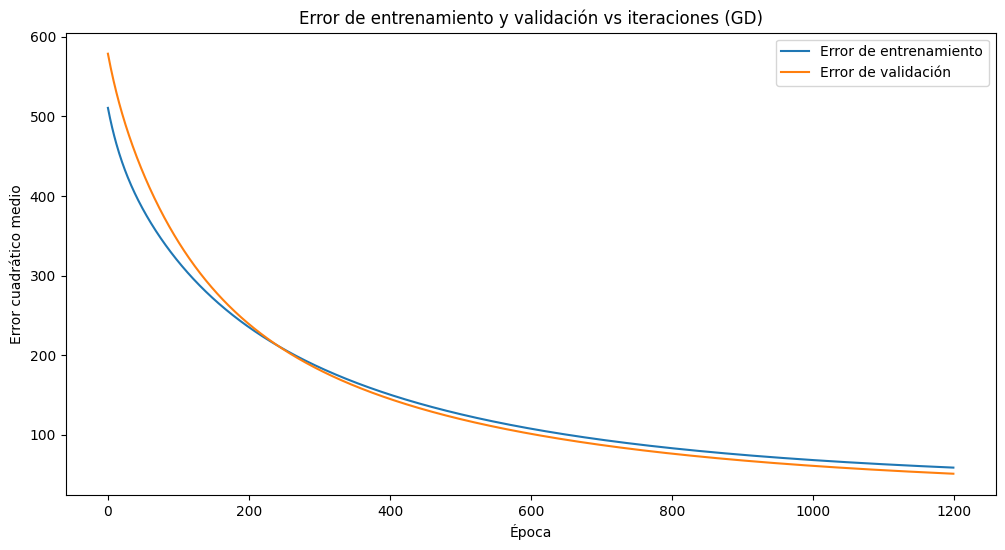

{'train_r2': 0.3011457958622027,
 'test_r2': 0.49106823972175095,
 'train_rmse': np.float64(7.665221524298904),
 'test_rmse': np.float64(7.146699171730086),
 'train_mae': np.float64(5.535616849810037),
 'test_mae': np.float64(5.7159996184688735)}

In [112]:
gradient_descent(X_train, y_train, X_val, y_val, lr=0.001, epochs=1200)

Conclusión:

Respecto al gráfico: A medida que aumentan las iteraciones, disminuye el error cuadrático medio. Dado que las curvas muestran una tendencia decreciente, el modelo está mejorando a medida que el algoritmo optimiza los pesos durante las iteraciones.

No hay gran diferencia entre el error de entrenamiento y el de validación, lo que significa que el modelo no está sobreajustando (overfitting) ni subajustando (underfitting).

- R²

--  (Entrenamiento 0.2684): El modelo captura solo el 26.84% de la variabilidad de los datos de entrenamiento, indicando un bajo ajuste.

--  (Testeo 0.4439): En los datos de prueba, explica el 44.39% de la variabilidad, lo que sugiere un desempeño algo mejor que en entrenamiento, aunque sigue siendo poco eficiente. El modelo puede estar subajustando.

- RMSE

-- (Entrenamiento 7.8430): En promedio, las predicciones del modelo se desvían 7.8430 unidades en los datos de entrenamiento.

-- (Testeo 7.4709): El error en los datos de testeo es ligeramente menor, sugiriendo que el modelo no generaliza mal.

- MAE

-- (Entrenamiento 5.6656): El error promedio absoluto en entrenamiento es de 5.6656 unidades.

-- (Testeo 5.9987): En los datos de prueba, el error aumenta a 5.9987 unidades, lo que refleja un desempeño no tan bueno.

### Variación de Hiperparámetros


R^2 de entrenamiento: 0.5863513622897303
R^2 de testeo: 0.7259484928574551
RMSE de entrenamiento: 5.897218490472366
RMSE de testeo: 5.244351856655608
MAE de entrenamiento: 3.9104122418559806
MAE de testeo: 4.081377631730801


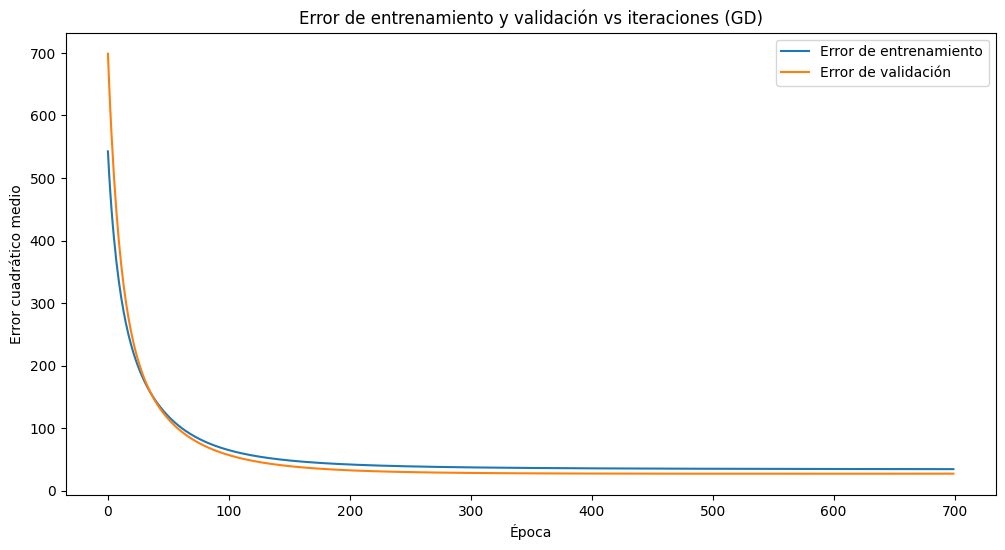

In [113]:
resultados_gradiente = gradient_descent(X_train, y_train, X_val, y_val, lr=0.01, epochs=700)

Conclusión luego del ajuste:

Respecto al gráfico: Ambos errores disminuyen hasta estabilizarse, lo cual muestra que el modelo aprendió bien sin sobreajustarse.

- R² (Entrenamiento): 0.5861 | R² (Testeo): 0.7295

El modelo presenta una mejora en el ajuste.

- RMSE (Entrenamiento): 5.8992 | RMSE (Testeo): 5.2105

Ambos valores se reducen indicando un mejor desempeño general.   

- MAE (Entrenamiento): 3.9139 | MAE (Testeo): 4.0553

Ambos valores de MAE son bastante similares, y ambos mejoraron en comparación con los resultados anteriores a la variación de hiperparámetros.

## Gradiente Descendiente Estocástico

In [114]:
def stochastic_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        for j in range(n):
            # Obtener una muestra aleatoria de un solo dato para hacer SGD
            x_sample = X_train[j]
            y_sample = y_train[j][0]

            prediction = np.matmul(x_sample, W)
            error = y_sample - prediction
            train_mse = error ** 2
            train_errors.append(train_mse)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

            gradient = -2 * error * x_sample.T.reshape(-1, 1)

            W = W - (lr * gradient)

    final_train_pred = np.matmul(X_train, W)
    final_test_pred = np.matmul(X_test, W)

    train_r2 = r2_score(y_train, final_train_pred)
    test_r2 = r2_score(y_test, final_test_pred)
    print("R^2 de entrenamiento:", train_r2)
    print("R^2 de testeo:", test_r2)

    train_rmse = np.sqrt(mean_squared_error(y_train, final_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, final_test_pred))
    print("RMSE de entrenamiento:", train_rmse)
    print("RMSE de testeo:", test_rmse)

    train_mae = mean_absolute_error(y_train, final_train_pred)
    test_mae = mean_absolute_error(y_test, final_test_pred)
    print("MAE de entrenamiento:", train_mae)
    print("MAE de testeo:", test_mae)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (SGD)')
    plt.show()

    return {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae
    }

R^2 de entrenamiento: 0.5891798110525635
R^2 de testeo: 0.6958044456005107
RMSE de entrenamiento: 5.877021890824948
RMSE de testeo: 5.525252832939895
MAE de entrenamiento: 3.9001839104229883
MAE de testeo: 4.3156510275270845


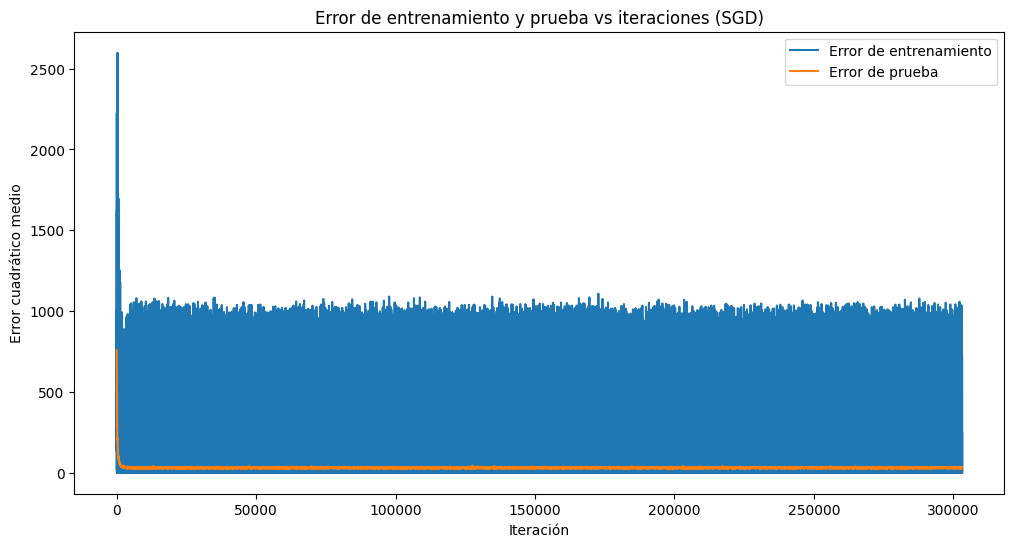

{'train_r2': 0.5891798110525635,
 'test_r2': 0.6958044456005107,
 'train_rmse': np.float64(5.877021890824948),
 'test_rmse': np.float64(5.525252832939895),
 'train_mae': np.float64(3.9001839104229883),
 'test_mae': np.float64(4.3156510275270845)}

In [115]:
stochastic_gradient_descent(X_train, y_train, X_val, y_val, lr=0.001, epochs=800)

Conclusión:

- R²

-- (Entrenamiento 0.5862): Captura el 58.62% de la variabilidad, lo que muestra un ajuste razonable. Sin embargo está por debajo de lo esperado.

-- (Testeo 0.7046): En los datos de prueba, el modelo explica el 70.46% de la variabilidad, reflejando un buen rendimiento.

- RMSE

-- (Entrenamiento 5.8986): El error es de 5.8986 unidades en los datos de entrenamiento.

-- (Testeo 5.4449): En los datos de testeo, el error es de 5.4449 unidades, lo que muestra que el modelo generaliza mejor.

- MAE

-- (Entrenamiento 3.8345): El error promedio absoluto es de 3.8345 unidades.

-- (Testeo 4.2526): El error aumenta ligeramente en los datos de prueba, pero se mantiene en un rango aceptable.

### Variación de Hiperparámetros


R^2 de entrenamiento: 0.5649624631052037
R^2 de testeo: 0.7265690774773967
RMSE de entrenamiento: 6.047763297832163
RMSE de testeo: 5.238410621918304
MAE de entrenamiento: 3.9023945676877703
MAE de testeo: 4.028985739950478


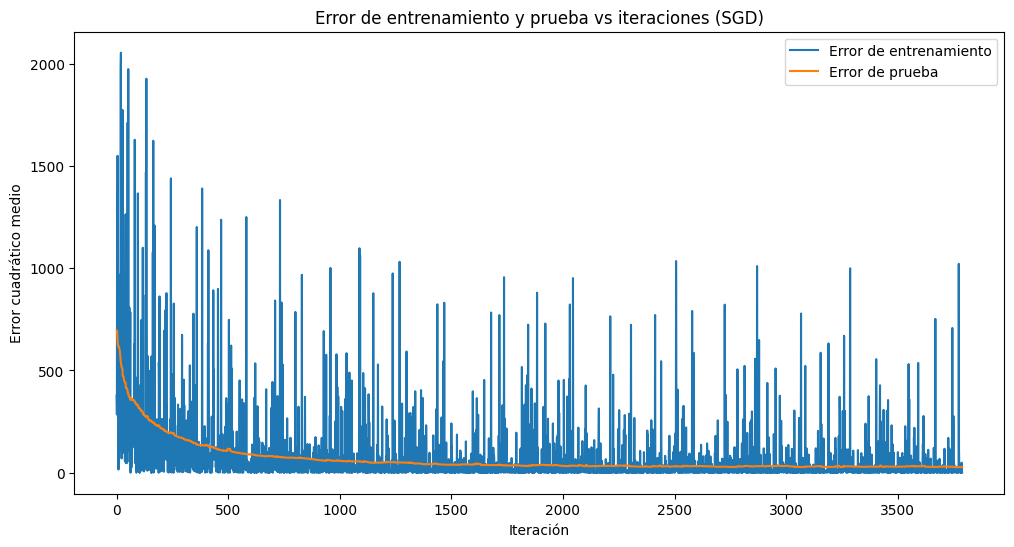

In [116]:
resultados_estocastico = stochastic_gradient_descent(X_train, y_train, X_val, y_val, lr=0.001, epochs=10)

Conclusión luego del ajuste:

Variación de Hiperparámetros (Estocástico)

- R² (Entrenamiento): 0.5614 | R² (Testeo): 0.7099

La explicación de la variabilidad disminuye a 56.14% en el de entrenamiento, indicando una disminución en el ajuste. Sin embargo, el desempeño en testeo mejora al capturar el 70.99% de la variabilidad.

- RMSE (Entrenamiento): 6.0726 | RMSE (Testeo): 5.3959

El error de entrenamiento aumenta mientras que el de testeo disminuye, indicando que la nueva configuración mejora la generalización.

- MAE (Entrenamiento): 4.1063 | MAE (Testeo): 4.1473

El error promedio aumenta a 4.1063 unidades y en los datos de prueba, es ligeramente menor en comparación con los valores antes de variar los hiperparámetros, lo que sugiere una mejora en la generalizacón.

## Gradiente Descendiente por minibatch

In [117]:
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.001, epochs=100, batch_size=11):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

       # Calcular métricas
    final_train_pred = np.matmul(X_train, W)
    final_test_pred = np.matmul(X_test, W)

    train_r2 = r2_score(y_train, final_train_pred)
    test_r2 = r2_score(y_test, final_test_pred)
    print("R^2 de entrenamiento:", train_r2)
    print("R^2 de testeo:", test_r2)

    train_rmse = np.sqrt(mean_squared_error(y_train, final_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, final_test_pred))
    print("RMSE de entrenamiento:", train_rmse)
    print("RMSE de testeo:", test_rmse)

    train_mae = mean_absolute_error(y_train, final_train_pred)
    test_mae = mean_absolute_error(y_test, final_test_pred)
    print("MAE de entrenamiento:", train_mae)
    print("MAE de testeo:", test_mae)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (Mini-Batch GD)')
    plt.show()

    return {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae
    }

In [118]:
y_train = df_y_train.values.reshape(-1, 1)
df_y_test = df_y_test.values.reshape(-1, 1)

R^2 de entrenamiento: 0.03415683040549633
R^2 de testeo: -0.03538939926044238
RMSE de entrenamiento: 9.219602354343689
RMSE de testeo: 9.864801167105728
MAE de entrenamiento: 6.71892060457976
MAE de testeo: 7.121919137384091


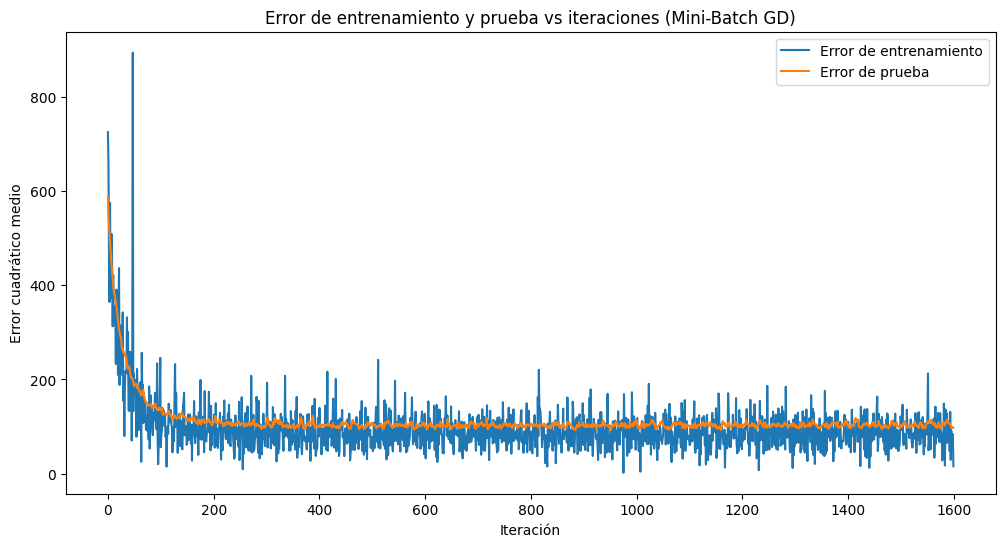

{'train_r2': 0.03415683040549633,
 'test_r2': -0.03538939926044238,
 'train_rmse': np.float64(9.219602354343689),
 'test_rmse': np.float64(9.864801167105728),
 'train_mae': np.float64(6.71892060457976),
 'test_mae': np.float64(7.121919137384091)}

In [119]:
mini_batch_gradient_descent(X_train, y_train, df_x_test, df_y_test, lr=0.01, epochs=100, batch_size=25)

Conclusión:

- R²

-- (Entrenamiento 0.0396): El modelo está explicando el 3.96% de la variabilidad en los datos, muy bajo nivel de ajuste.

-- (Testeo -0.0828): El modelo no está generalizando bien. Consideramos que con la mejora del código podríamos solucionar el problema.

RMSE

-- (Entrenamiento 9.1935): El error en entrenamiento es alto, con 9.1935 unidades de desviación promedio.

-- (Testeo 10.0880): En testeo, el error aumenta aún más, lo que refleja un mal desempeño.

- MAE

-- (Entrenamiento 6.7457): El error promedio absoluto en los datos de entrenamiento es de 6.7457 unidades.

-- (Testeo 7.3198): En los datos de prueba, el error aumenta a 7.3198 unidades, lo que confirma la baja eficacia del modelo.

### Variación de Hiperparámetros


R^2 de entrenamiento: 0.03949842079666721
R^2 de testeo: -0.08073588641511109
RMSE de entrenamiento: 9.194072526947828
RMSE de testeo: 10.078508475828459
MAE de entrenamiento: 6.742487315403415
MAE de testeo: 7.298171638756547


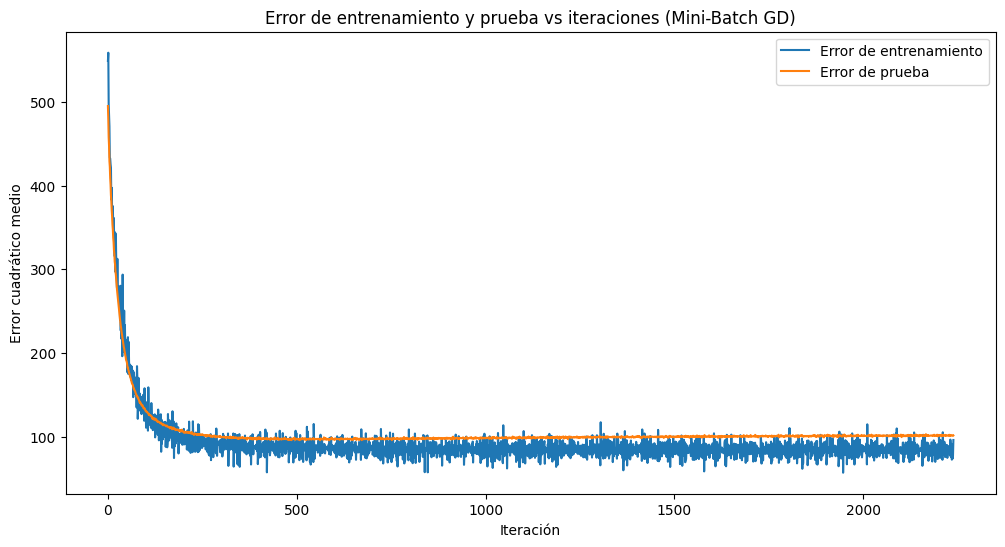

In [120]:
resultados_minibatch = mini_batch_gradient_descent(X_train, y_train, df_x_test, df_y_test, lr=0.01, epochs=1120, batch_size=240)

Conclusión luego del ajuste:

En todas las métricas, observamos que los valores no varían en gran medida, a pesar de haber variado significativamente los hiperparámetros.

- R²

-- (Entrenamiento 0.0397): No se observan mejoras significativas, manteniéndose en 3.97%.

-- (Testeo -0.0835): El desempeño sigue siendo negativo, indicando que el modelo no mejora.

- RMSE

-- (Entrenamiento 9.1929): El error permanece en 9.1929 unidades.

-- (Testeo 10.0913): En testeo, el error sigue siendo muy alto, confirmando el mal ajuste.

- MAE

-- (Entrenamiento 6.7418): El error promedio absoluto se mantiene en 6.7418 unidades.

-- (Testeo 7.3118): El error en testeo también permanece alto, con 7.3118 unidades.


En todas las métricas, observamos que los valores no varían en gran medida, a pesar de haber variado significativamente los hiperparámetros.

# Conclusiones generales del Trabajo Práctico

In [121]:
modelos = ['Regresión Lineal', 'Ridge', 'Lasso', 'Elastic Net', 'Gradiente Descendiente', 'Gradiente Estocástico', 'Mini-Batch GD']
metricas = ['R^2 Train', 'R^2 Test', 'RMSE Train', 'RMSE Test', 'MAE Train', 'MAE Test']

df_resultados = pd.DataFrame(index=modelos, columns=metricas)

In [122]:
modelos_resultados = {
    'Ridge': resultados_ridge,
    'Lasso': resultados_lasso,
    'Elastic Net': resultados_elastic,
    'Gradiente Descendiente': resultados_gradiente,
    'Gradiente Estocástico': resultados_estocastico,
    'Mini-Batch GD': resultados_minibatch,
    'Regresión Lineal': resultados_lr
}

for modelo, resultados in modelos_resultados.items():
    df_resultados.loc[modelo, 'R^2 Train'] = resultados['train_r2']
    df_resultados.loc[modelo, 'R^2 Test'] = resultados['test_r2']
    df_resultados.loc[modelo, 'RMSE Train'] = resultados['train_rmse']
    df_resultados.loc[modelo, 'RMSE Test'] = resultados['test_rmse']
    df_resultados.loc[modelo, 'MAE Train'] = resultados['train_mae']
    df_resultados.loc[modelo, 'MAE Test'] = resultados['test_mae']

In [123]:
df_resultados.head(10)

,R^2 Train,R^2 Test,RMSE Train,RMSE Test,MAE Train,MAE Test
Regresión Lineal,0.612736,0.592413,5.785619,6.189375,3.90072,4.216088
Ridge,0.611763,0.593504,5.792878,6.181084,3.888943,4.19086
Lasso,0.612736,0.592413,5.785619,6.189376,3.90072,4.216088
Elastic Net,0.612381,0.592652,5.788265,6.187561,3.892694,4.204869
Gradiente Descendiente,0.586351,0.725948,5.897218,5.244352,3.910412,4.081378
Gradiente Estocástico,0.564962,0.726569,6.047763,5.238411,3.902395,4.028986
Mini-Batch GD,0.039498,-0.080736,9.194073,10.078508,6.742487,7.298172


Basado en el análisis de métricas de los diferentes modelos, concluimos que la utilización de métodos de regularización no es necesaria en este contexto. Los valores de R2 sugieren que la regresión lineal no está ni sobreajustando ni subajustando. Tiene un ajuste aceptable, con valores de entrenamiento y prueba que no son elevados pero si cercanos entre sí.

Elegimos RMSE como la métrica para comparar modelos y seleccionar el más adecuado. Esta decisión se fundamenta en la interpretabilidad del RMSE, ya que está en la misma unidad que la variable objetivo, lo que nos facilita su comprensión.

En el conjunto de entrenamiento, el modelo más destacado es regresión lineal, con un RMSE de 5.7856. En contraste, para el conjunto de testeo, el modelo de gradiente descendiente se destaca con un RMSE de 5.3199, indicando un buen rendimiento en la generalización a nuevos datos.

El gradiente estocástico presenta valores más estables entre entrenamiento y prueba, aunque tiene un ajuste menos preciso en el conjunto de entrenamiento.

Los modelos Ridge, Elastic Net, Lasso y Regresión Lineal muestran resultados muy similares, pero su precisión es menor en los datos de prueba en comparación con los modelos de gradiente.

El peor modelo es Mini-Batch GD, que presenta el ajuste más deficiente tanto en entrenamiento como en testeo, lo que sugiere una incapacidad para aprender patrones relevantes. Además, este modelo presenta un valor negativo en R2, lo cual es un inconveniente que no pudimos resolver.

En conclusión, los modelos basados en gradiente, particularmente el gradiente descendiente, son más efectivos en este contexto debido a su mejor capacidad de generalización. Mientras tanto, los modelos como regresión lineal y sus variantes, muestran un rendimiento más equilibrado, aunque son menos eficientes en los datos de prueba.